In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [31]:
from matplotlib import pyplot as plt

In [32]:
data = pd.read_csv('/content/SOCR-HeightWeight.csv')
shape = data.shape
print("Example:\n", data.head(), "\n\nrows:",shape[0],"\tcol:", shape[1])

Example:
    Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971 

rows: 25000 	col: 3


In [33]:
data.drop('Index', axis = 1, inplace=True)

In [34]:
def gradient_descent(w,b,L,data):
  m = len(data)
  dw = 0 #derrivative w
  db = 0
  for i in range(m):
    x = data.iloc[i, 0]
    y = data.iloc[i, 1]
    dw += (((w*x)+b-y)*x)
    db += ((w*x)+b-y)
  dw = dw/m
  db = db/m
  return w-(L*dw), b-(L*db)

0
10


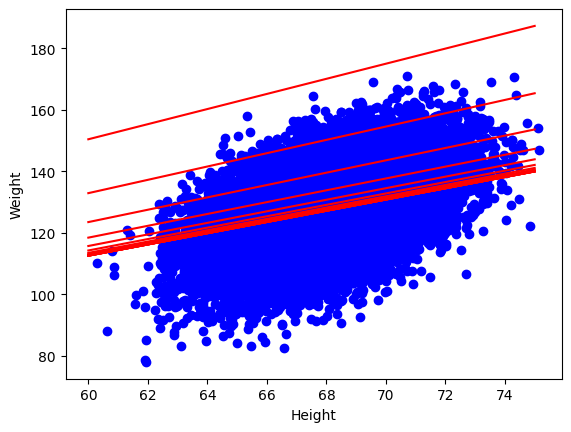

In [47]:
plt.scatter(data['Height(Inches)'],data['Weight(Pounds)'], color="blue")
epochs = 100
w=3
b=3
prev_w = w
prev_b = b
min = int(data['Height(Inches)'].min())
max = int(data['Height(Inches)'].max())
for i in range(epochs):
  if(i%10==0):
    print(i)
  w,b = gradient_descent(w,b,0.0001,data)
  # print("w:",w,"b:",b)
  plt.plot(list(range(min, max+1)), [(w*x+b) for x in range(min,max+1)], color="red")
  if(format(prev_b,'.4f')<=format(b,'.4f') and format(prev_w,'.4f')<=format(w,'.4f')):
    break
  else:
    prev_b = b
    prev_w = w

w = prev_w
b = prev_b
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [55]:
X_test = data.iloc[shape[0]-100:, 0]
y_test = data.iloc[shape[0]-100:, 1]

prediction = []
for x in X_test:
  y = (w*x)+b
  prediction.append(y)

y_predict = pd.DataFrame({"Weight":prediction})
print(y_predict.head())

       Weight
0  122.151304
1  129.053834
2  124.730998
3  127.269111
4  129.877768


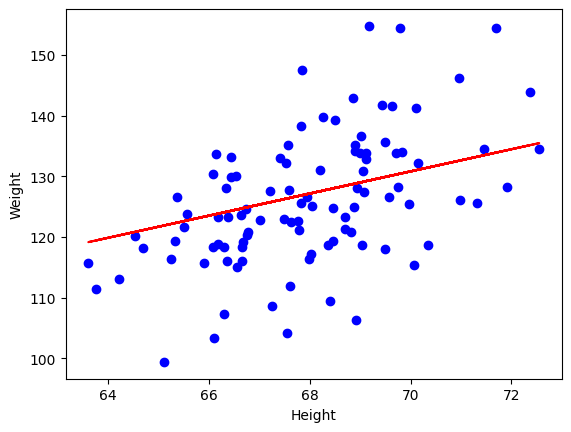

In [56]:
min_test = int(X_test.min())
max_test = int(X_test.max())
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, y_predict, color = "red")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()